In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
#eu tenho 12 colunas disponíveis para a análise | quality é a target/coluna que queremos investigar
#todas as colunas são/deveriam estar em formato numérico o que pode facilitar a análise de correlação
#é necessário verificar se existe valores nulos ou 'outliers' específicos em cada material
df = pd.read_csv('winequality-red.csv')
print(db.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [29]:
#aqui é possível verificar que não existe valores nulos para o dataset
#agora vamos verificar uma correlação direta entre as variáveis.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [50]:
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

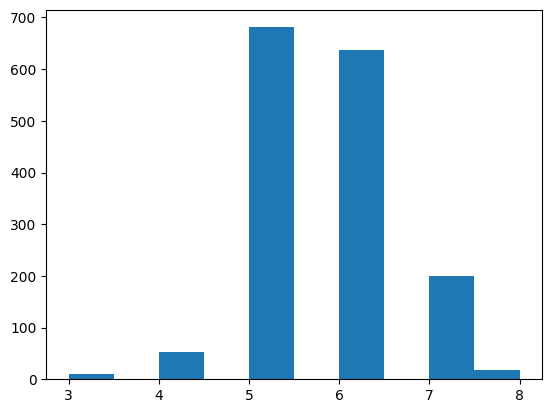

In [ ]:
# Análise da distribuição da variável 'quality'
# A variável de qualidade apresenta valores entre 3 e 8
# Uma abordagem possível é classificar os vinhos como bons (>= 7) e ruins
plt.hist(df['quality'])

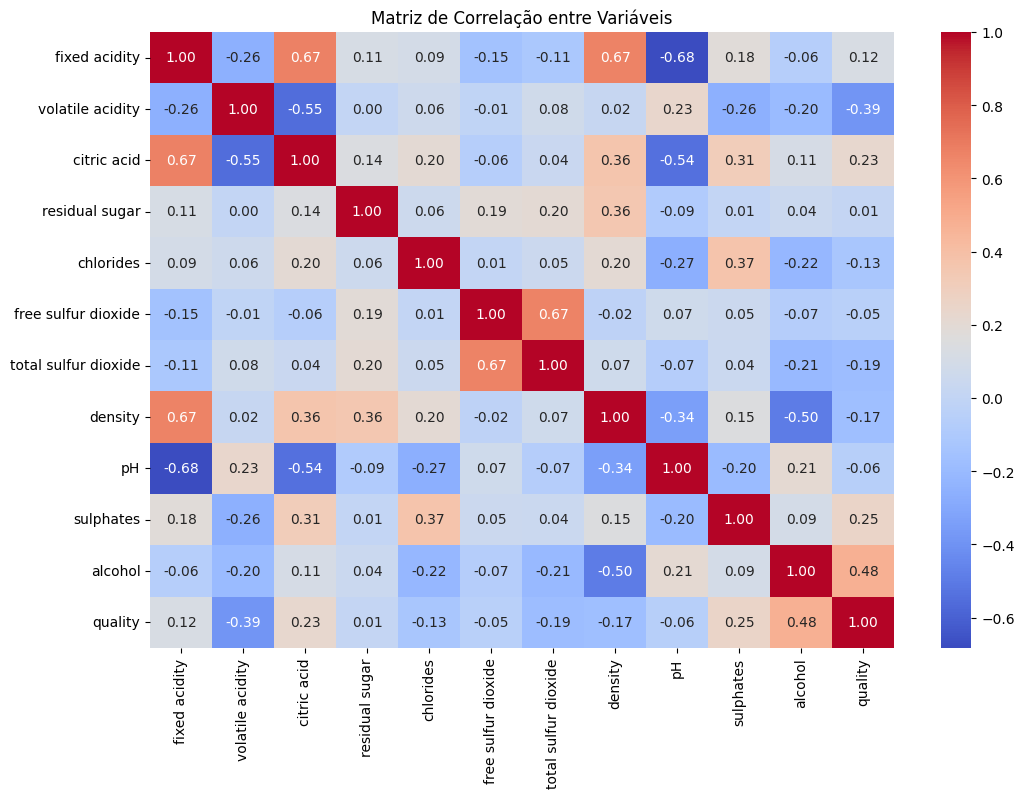

In [ ]:
# Análise de correlação entre as variáveis
# Não há uma correlação fortemente significativa entre as variáveis preditoras e a variável alvo
# As variáveis com maior correlação positiva com a qualidade são: 'alcohol' (média), 'sulphates' (fraca) e 'citric acid' (fraca)
# Há uma correlação negativa moderada com 'volatile acidity', o que pode ser um ponto importante: quanto menor a acidez volátil, maior tende a ser a qualidade do vinho

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

In [ ]:
# Transformação da variável alvo para uma classificação binária
# Vinhos com qualidade maior ou igual a 7 são considerados bons (1), os demais são considerados ruins (0)
X = df.drop('quality', axis = 1)
y = df['quality']
y = y.apply(lambda y_value: 1 if y_value >= 7 else 0)

y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

(array([1382.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         217.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

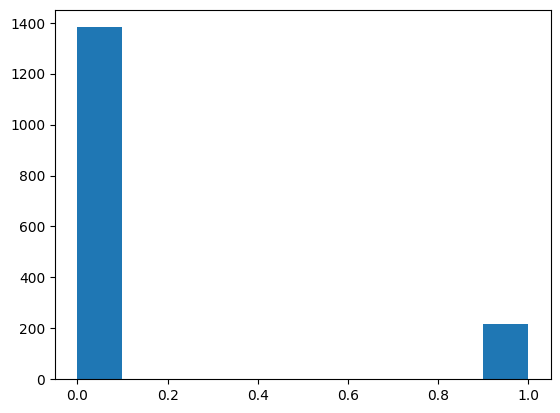

In [ ]:
# Visualização da nova distribuição da variável alvo
plt.hist(y)

In [ ]:
# Separação do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=3)

In [ ]:
# Criação e treinamento do modelo Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [123]:
# Avaliação da acurácia do modelo
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy: ', test_data_accuracy)

Accuracy:  0.928125


In [ ]:
def classificar_vinho(modelo):
    print("\nInforme as características do vinho para classificação:")
    try:
        fixed_acidity = float(input("Fixed acidity: "))
        volatile_acidity = float(input("Volatile acidity: "))
        citric_acid = float(input("Citric acid: "))
        residual_sugar = float(input("Residual sugar: "))
        chlorides = float(input("Chlorides: "))
        free_sulfur_dioxide = float(input("Free sulfur dioxide: "))
        total_sulfur_dioxide = float(input("Total sulfur dioxide: "))
        density = float(input("Density: "))
        pH = float(input("pH: "))
        sulphates = float(input("Sulphates: "))
        alcohol = float(input("Alcohol: "))

        # Criação do DataFrame com os dados inseridos
        entrada = pd.DataFrame([[
            fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
            chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density,
            pH, sulphates, alcohol
        ]], columns=X.columns)

        # Previsão usando o modelo treinado
        resultado = modelo.predict(entrada)[0]

        if resultado == 1:
            print("\nResultado: Este vinho é classificado como BOM!")
        else:
            print("\nResultado: Este vinho é classificado como RUIM.")
    except Exception as e:
        print("Erro ao processar entrada. Certifique-se de digitar apenas números válidos.")
        print(e)

# Exemplo de uso (após o modelo já estar treinado):
classificar_vinho(model)
